In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *

In [60]:
table,info = import_lightcurve('betapic/test/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits')

In [29]:
#table = table['TIME','PDCSAP_FLUX','QUALITY']
table = table['time','corrected flux','quality']

In [50]:
t, flux, quality, real = clean_data(table)

In [61]:
timestep = calculate_timestep(table)
factor = ((1/48)/timestep)

In [62]:
final_flux,smoothing_func = flatten(table['TIME'],table['PDCSAP_FLUX'],window_length=2.5,return_trend=True)

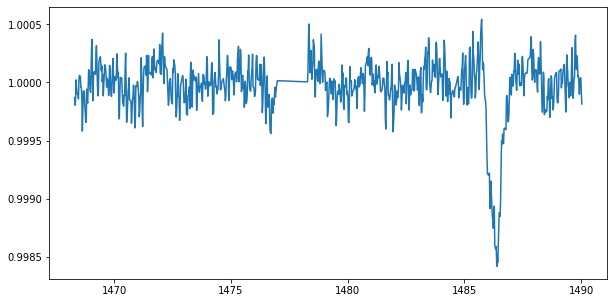

In [64]:
plt.figure(figsize=(10,5))
#plt.plot(t,normalise_lc(flux))
plt.plot(table['TIME'],final_flux)
#plt.plot(t,flux-smoothing_func)

In [75]:
T1 = test_statistic_array(table['PDCSAP_FLUX'],60 * factor)
T1

ValueError: Big-endian buffer not supported on little-endian compiler

In [72]:
Ts = nonzero(T1).std()


m, n = np.unravel_index(T1.argmin(), T1.shape) 
m

30

In [73]:
minT = T1[m, n]
minT_time = t[n]
minT_duration = m * timestep
Tm_start = n-math.floor((m-1)/2)
Tm_end = Tm_start + m
Tm_depth = flux[Tm_start:Tm_end].mean()

In [74]:

print("Timestep of lightcurve: ", round(timestep * 1440, 3), "minutes.")
print("Maximum transit chance:")
print("   Time =", round(minT_time, 2), "days.")
print("   Duration =", round(minT_duration, 2), "days.")
print("   T =", round(minT, 1))
print("   T/sigma =", round(minT / Ts), 1)


Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1484.76 days.
   Duration = 0.62 days.
   T = -24.1
   T/sigma = -6 1
